# 01. Market Expectations In The Cross-Section Of Present Values

TBD

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from settings import config
from pathlib import Path
import load_data
import regressions
import pull_CRSP_index
import pull_ken_french_data
import pull_fred

# Load environment variables
DATA_DIR = Path(config("DATA_DIR"))
OUTPUT_DIR = Path(config("OUTPUT_DIR"))
WRDS_USERNAME = config("WRDS_USERNAME")
START_DATE = config("START_DATE")
END_DATE = config("END_DATE")

## Prep Data

### Step 1: Fama-French Data

In [2]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")

C:\Users\zacjo\AppData\Local\Temp\ipykernel_6304\3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
C:\Users\zacjo\AppData\Local\Temp\ipykernel_6304\3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
C:\Users\zacjo\AppData\Local\Temp\ipykernel_6304\3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench"

In [4]:
print(bm_6_portfolios['DESCR'])

6 Portfolios 2x3
----------------

This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202412 CRSP database. It contains value- and equal-weighted returns for portfolios formed on ME and BEME. The portfolios are constructed at the end of June. BEME is book value at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points include utilities and include financials. The portfolios include utilities and include financials. Copyright 2024 Eugene F. Fama and Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (58 rows x 6 cols)
  1 : Average Equal Weighted Returns -- Monthly (58 rows x 6 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 6 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 6 cols)
  4 : Number of Firms in Portfolios (58 rows x 6 cols)
  5 : Average Market Cap (58 rows x 6 c

In [5]:
bm_6_portfolios[6].head()

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
Date,,,,,,
2020-03,0.1810,0.5313,1.1804,0.1574,0.5496,1.0957
2020-04,0.1813,0.5308,1.1705,0.1569,0.5448,1.0928
2020-05,0.1792,0.5297,1.1856,0.1561,0.5449,1.0953
2020-06,0.1792,0.5280,1.1877,0.1560,0.5418,1.1002
2020-07,0.1642,0.4626,1.1351,0.1252,0.4527,0.8969


In [6]:
# This will pull the needed portfolio data from Ken French's website
# Running doit will pull the data automatically and save it to the data directory

bm_6_portfolios = pull_ken_french_data.pull_ken_french_excel(
    dataset_name="6_Portfolios_2x3",
    data_dir=DATA_DIR,
    log=True,
    start_date=START_DATE,
    end_date=END_DATE,
)

bm_25_portfolios = pull_ken_french_data.pull_ken_french_excel(
    dataset_name="25_Portfolios_5x5",
    data_dir=DATA_DIR,
    log=True,
    start_date=START_DATE,
    end_date=END_DATE,
)

bm_100_portfolios = pull_ken_french_data.pull_ken_french_excel(
    dataset_name="100_Portfolios_10x10",
    data_dir=DATA_DIR,
    log=True,
    start_date=START_DATE,
    end_date=END_DATE,
)

Excel file saved to C:\Users\zacjo\OneDrive\Documents\GitHub\finm32900_project_group6\data\6_Portfolios_2x3.xlsx
Excel file saved to C:\Users\zacjo\OneDrive\Documents\GitHub\finm32900_project_group6\data\25_Portfolios_5x5.xlsx
Excel file saved to C:\Users\zacjo\OneDrive\Documents\GitHub\finm32900_project_group6\data\100_Portfolios_10x10.xlsx


### Step 2: CRSP Market Capitalization Weighted Index Data

In [7]:
crsp = pull_CRSP_index.pull_crsp_value_weighted_index()

Loading library list...
Done
Approximately 1189 rows in crsp.msi.
CRSP.msi Table Columns: ['name', 'nullable', 'type', 'comment']
CRSP value-weighted index data saved to crsp_value_weighted_index.csv
CSV file saved to C:\Users\zacjo\OneDrive\Documents\GitHub\finm32900_project_group6\data\crsp_value_weighted_index.csv


In [8]:
crsp_loaded = load_data.load_crsp_index()
crsp_loaded

,date,value_weighted_return
0,1930-02-01,0.058407
1,1930-03-01,0.028242
2,1930-04-01,0.074631
3,1930-05-01,-0.020541
4,1930-06-01,-0.014010
...,...,...
967,2010-09-01,-0.042863
968,2010-10-01,0.091628
969,2010-11-01,0.038591
970,2010-12-01,0.005117


### Step 3: Risk-Free Rate Data

In [9]:
rf = pull_fred.pull_fred()
rf

,GDP,CPIAUCNS,GDPC1,DPCREDIT,EFFR,OBFR,SOFR,DFEDTARU,DFEDTARL,WALCL,...,GFDEBTN,WTREGEN,RRPONTSYAWARD,RRPONTSYD,RPONTSYD,WSDONTL,TB3MS,Gen_IORB,ONRRP_CTPY_LIMIT,ONRP_AGG_LIMIT
DATE,,,,,,,,,,,,,,,,,,,,,
1930-01-01,NaN,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-02-01,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-03-01,NaN,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-04-01,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-05-01,NaN,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2014-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN
2021-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN


In [10]:
rf_monthly = load_data.load_fred_data()
rf_monthly

DATE
1934-01-01    0.060000
1934-02-01    0.051667
1934-03-01    0.020000
1934-04-01    0.012500
1934-05-01    0.013333
                ...   
2010-08-01    0.013333
2010-09-01    0.012500
2010-10-01    0.010833
2010-11-01    0.011667
2010-12-01    0.011667
Name: TB3MS, Length: 924, dtype: float64

### Step 4: Excess Returns

In [11]:
ex_ret = load_data.load_and_compute_excess_returns()
ex_ret

1934-01-01   -0.042124
1934-02-01    0.075112
1934-03-01   -0.044287
1934-04-01   -0.008075
1934-05-01   -0.031678
                ...   
2010-08-01    0.057027
2010-09-01   -0.055363
2010-10-01    0.080795
2010-11-01    0.026924
2010-12-01   -0.006550
Length: 924, dtype: float64

# Run Regressions


Processing 6-Portfolios Data
Aligned data from 1934-01-01 to 2010-12-01
Number of dates: 924
First-Stage Estimated Loadings (phi_i):
SMALL LoBM: 4.9389
ME1 BM2: 4.1923
SMALL HiBM: 4.5164
BIG LoBM: 3.3472
ME2 BM2: 3.0851
BIG HiBM: 3.5681

Estimated Latent Factor (F_t) Sample:
1934-01-01    8.245644
1934-02-01    3.233872
1934-03-01    2.143052
1934-04-01    2.353900
1934-05-01   -0.210284
dtype: float64

Results for 6-Portfolios Portfolio Data

Third-Stage In-Sample Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     12.61
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           0.000403
Time:                        21:04:21   Log-Likelihood:                -85.923
No. Observations:                 9

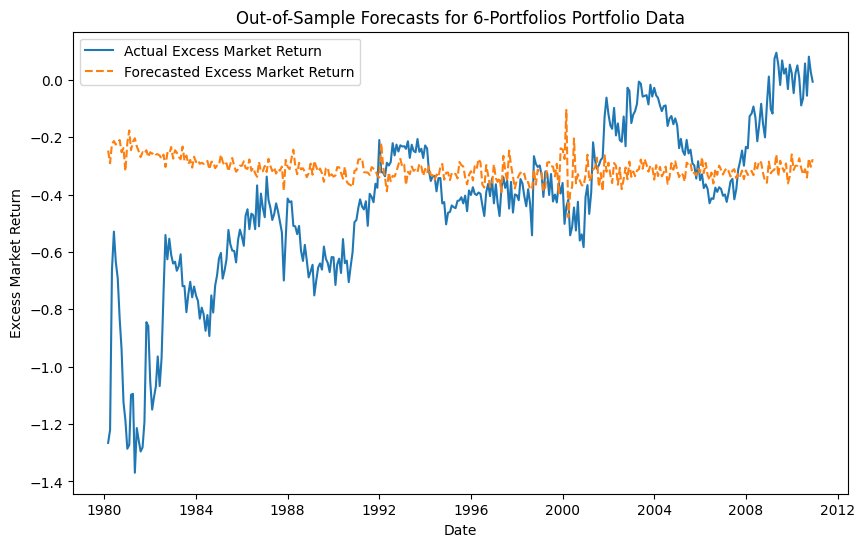


Processing 25-Portfolios Data
Aligned data from 1934-01-01 to 2010-12-01
Number of dates: 924
First-Stage Estimated Loadings (phi_i):
SMALL LoBM: 6.4672
ME1 BM2: 4.0083
ME1 BM3: 5.0484
ME1 BM4: 4.5728
SMALL HiBM: 5.1807
ME2 BM1: 5.2503
ME2 BM2: 4.6595
ME2 BM3: 4.1510
ME2 BM4: 3.9898
ME2 BM5: 4.7927
ME3 BM1: 4.9065
ME3 BM2: 4.1174
ME3 BM3: 4.1485
ME3 BM4: 3.9801
ME3 BM5: 4.4178
ME4 BM1: 4.0141
ME4 BM2: 3.9144
ME4 BM3: 3.7526
ME4 BM4: 3.9517
ME4 BM5: 4.0717
BIG LoBM: 3.3343
ME5 BM2: 2.8533
ME5 BM3: 3.0388
ME5 BM4: 3.0372
BIG HiBM: 3.7395

Estimated Latent Factor (F_t) Sample:
1934-01-01    18.777555
1934-02-01     0.427849
1934-03-01     1.917834
1934-04-01     1.703839
1934-05-01    -0.796795
dtype: float64

Results for 25-Portfolios Portfolio Data

Third-Stage In-Sample Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   

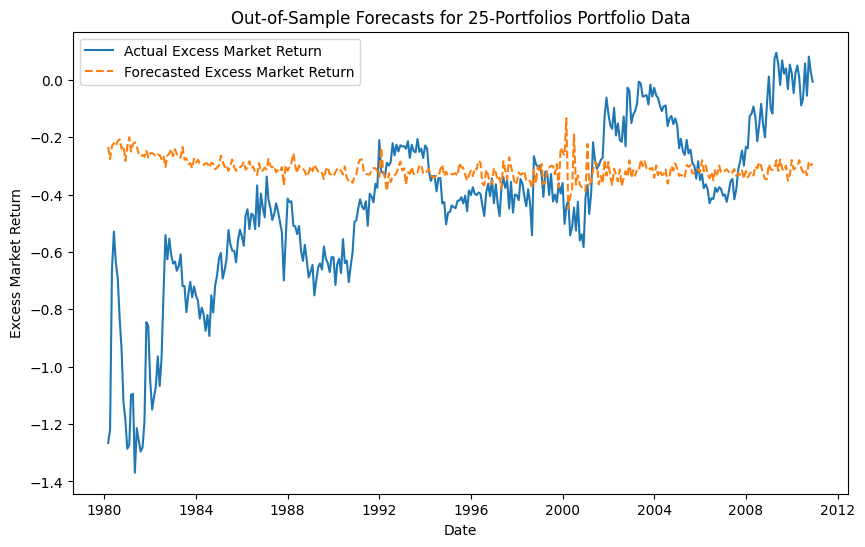


Processing 100-Portfolios Data
Aligned data from 1934-01-01 to 2010-12-01
Number of dates: 924
First-Stage Estimated Loadings (phi_i):
SMALL LoBM: -15.8688
ME1 BM2: -23.5669
ME1 BM3: -20.6933
ME1 BM4: -6.0147
ME1 BM5: -3.4240
ME1 BM6: 4.7385
ME1 BM7: 5.0469
ME1 BM8: 4.7379
ME1 BM9: 5.0909
SMALL HiBM: 5.8873
ME2 BM1: -13.0098
ME2 BM2: -14.4991
ME2 BM3: -7.2510
ME2 BM4: 4.0284
ME2 BM5: 4.6982
ME2 BM6: 4.9306
ME2 BM7: 4.5710
ME2 BM8: 4.5890
ME2 BM9: 4.6222
ME2 BM10: 5.6810
ME3 BM1: -1.0868
ME3 BM2: -1.0858
ME3 BM3: 4.1012
ME3 BM4: 5.1920
ME3 BM5: 4.6064
ME3 BM6: 3.6532
ME3 BM7: 4.5115
ME3 BM8: 3.7532
ME3 BM9: 4.5368
ME3 BM10: 4.9138
ME4 BM1: -0.4988
ME4 BM2: 4.8305
ME4 BM3: 4.7076
ME4 BM4: 4.7070
ME4 BM5: 4.5303
ME4 BM6: 3.9949
ME4 BM7: 3.5800
ME4 BM8: 4.2327
ME4 BM9: 4.5678
ME4 BM10: 5.3811
ME5 BM1: 4.8817
ME5 BM2: 4.4923
ME5 BM3: 3.5679
ME5 BM4: 4.1453
ME5 BM5: 4.2865
ME5 BM6: 3.5553
ME5 BM7: 3.7129
ME5 BM8: 3.6731
ME5 BM9: 4.5314
ME5 BM10: 4.7348
ME6 BM1: 5.2947
ME6 BM2: 4.2035
ME6 BM

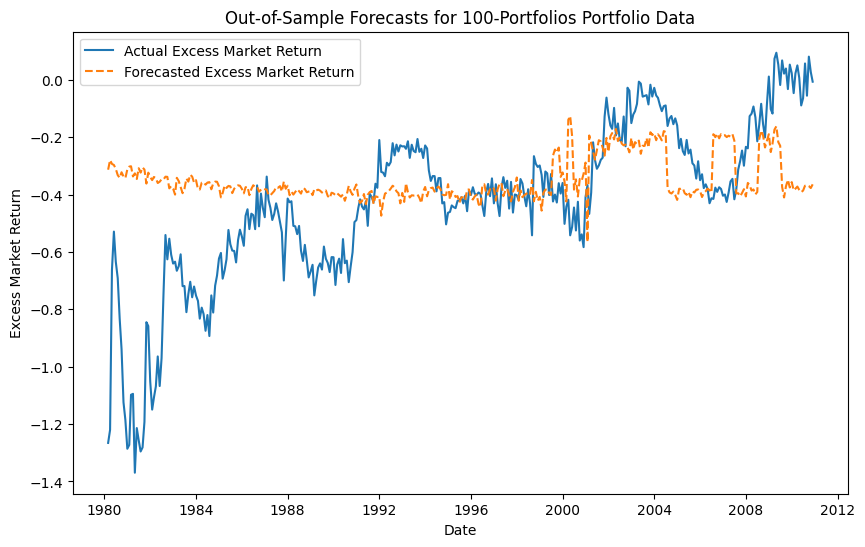

{'6-Portfolios': {'in_sample': {'phi': {'SMALL LoBM': 4.938879750137696,
    'ME1 BM2': 4.192277677415945,
    'SMALL HiBM': 4.5163570000413165,
    'BIG LoBM': 3.347189193591691,
    'ME2 BM2': 3.085146224878344,
    'BIG HiBM': 3.5680797826486557},
   'F_series': 1934-01-01    8.245644
   1934-02-01    3.233872
   1934-03-01    2.143052
   1934-04-01    2.353900
   1934-05-01   -0.210284
                   ...   
   2010-08-01   -2.231791
   2010-09-01    2.787918
   2010-10-01    0.533693
   2010-11-01    2.453346
   2010-12-01    0.544818
   Length: 924, dtype: float64,
   'third_model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23b711b8100>,
   'v_df':             SMALL LoBM  ME1 BM2  SMALL HiBM  BIG LoBM  ME2 BM2  BIG HiBM
   1934-01-01     21.5203  28.9416     38.4208    9.8669  16.8167   24.1368
   1934-02-01     -0.2935   1.1685      5.1400   -2.3815  -3.1075   -3.8100
   1934-03-01      4.7722   2.0058     -0.0115   -0.0029  -0.1305   -0.6200
   1934-

In [12]:
def regress():
    portfolio_datasets = {
        "6-Portfolios": "6_Portfolios_2x3",
        "25-Portfolios": "25_Portfolios_5x5",
        "100-Portfolios": "100_Portfolios_10x10"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\nProcessing {label} Data")
        in_sample = regressions.run_in_sample_pls(dataset_name, weighting="value-weighted", h=1)
        recursive = regressions.run_recursive_forecast(dataset_name, weighting="value-weighted", h=1)
        regressions.display_results(label, in_sample, recursive)
        results[label] = {"in_sample": in_sample, "recursive": recursive}
    return results

regress()